***
### 3.1.1 差分方程
1. 利用特征值和特征向量求$F_k$的通项

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

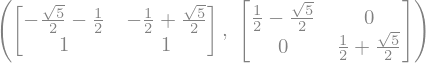

In [2]:
A = sp.Matrix([[0, 1], [1, 1]])
val = A.eigenvals()
vec = A.eigenvects()

k = sp.var('k', positive=True, integer=True)

P, D = A.diagonalize()
P, D

In [3]:
Ak = P @ (D**k) @ P.inv()

In [4]:
Fk = Ak @ sp.Matrix([1, 1])

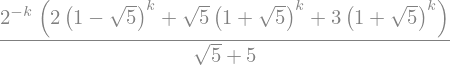

In [5]:
s = sp.simplify(Fk[0])
s

In [6]:
# sm = []
# for i in range(20):
#     sm.append(s.subs(k, i).n(5))
# print(sm)
s.subs(k, 19).n()

2. 差分方程的特征根解法<br/>

观察差分方程 $F_{k+2}-F_{k+1}-F_k=0$<br/>
得到其特征方程 $\lambda^2-\lambda-1=0$

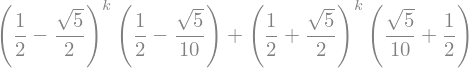

In [7]:
t, c1, c2 = sp.var('t, c1, c2')
t1, t2 = sp.solve(t**2-t-1)
eq1 = c1 + c2 - 1
eq2 = c1*t1 + c2*t2 -1
s = sp.solve([eq1, eq2], [c1, c2])
k = sp.var('k')
Fk = sp.symbols('Fk', cls=sp.Function)
Fk = s[c1]*(t1)**k + s[c2]*(t2)**k
Fk

3. 直接求解：sp.rsolve()

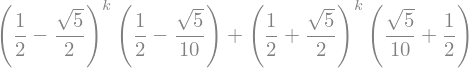

In [8]:
k = sp.var('k')
Fk = sp.Function('Fk')
diffeq = Fk(k+2) - Fk(k+1) - Fk(k)
sp.rsolve(diffeq, Fk(k), {Fk(0):1, Fk(1):1})

***
### 3.1.2 莱斯利（Leslie）种群模型
$$
{\boldsymbol L=}
\begin{bmatrix}
a_1 	&a_2	&\cdots &a_{n-1} 	&a_n\\
b_1 	&0   	&\cdots &0 	  		&0\\
0   	&b_2 	&\cdots &0       	&0\\
\vdots	&\vdots &		&\vdots		&\vdots\\
0 		&0		&\cdots	&b_{n-1} 	&0
\end{bmatrix}
$$

$${\boldsymbol x}^{(k)} =\boldsymbol {Lx}^{(k-1)}$$

$${\boldsymbol x}^{(k)} ={\boldsymbol L}^k{\boldsymbol x}^{(0)}$$

$a_i$-生育率
$b_i$-存活率

In [9]:
import numpy as np
import sympy as sp
x0 = np.array([[500], [1000], [500]])
L = np.array([[0, 4, 3], [0.5, 0, 0], [0, 0.25, 0]])
np.linalg.eig(L)
x1 = L @ x0
x2 = L @ x1
x3 = L @ x2
x1, x2, x3

(array([[5500.],
        [ 250.],
        [ 250.]]),
 array([[1750. ],
        [2750. ],
        [  62.5]]),
 array([[11187.5],
        [  875. ],
        [  687.5]]))

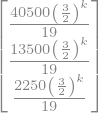

In [10]:
L = sp.Matrix([[0, 4, 3], [sp.Rational(1, 2), 0, 0], [0, sp.Rational(1, 4), 0]])
eigenva = list(L.eigenvals())
eigenve = L.eigenvects()
eigenva, eigenve

P, D = L.diagonalize()  # Matrix.diagonalize() from sp.Matrix 直接进行特征值分解，D为对角阵
P, D

Pinv = P.inv()
cc = sp.simplify(Pinv @ x0)
c = cc[0]
k = sp.var('k')
xk = sp.Function('xk')
xk = c*eigenva[0]**k*sp.Matrix([[18], [6], [1]])
xk

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [12]:
import pandas as pd
size = 31
x = np.arange(size)
y = [0]*size
for i in x:
    y[i] = (P @ D**i @ Pinv @ x0).n()
y0 = [y[i][0] for i in range(size)]
y1 = [y[i][1] for i in range(size)]
y2 = [y[i][2] for i in range(size)]
df = pd.DataFrame({
    'y0': y0,
    'y1': y1,
    'y2': y2
}, index=x, dtype=float)
df['sum'] = df['y0'] + df['y1'] + df['y2']
df['prediction'] = [sum(xk.subs(k, i)).n() for i in range(size)]
df

,y0,y1,y2,sum,prediction
0,5.000000e+02,1.000000e+03,5.000000e+02,2.000000e+03,2960.52631578947
1,5.500000e+03,2.500000e+02,2.500000e+02,6.000000e+03,4440.78947368421
2,1.750000e+03,2.750000e+03,6.250000e+01,4.562500e+03,6661.18421052632
3,1.118750e+04,8.750000e+02,6.875000e+02,1.275000e+04,9991.77631578947
4,5.562500e+03,5.593750e+03,2.187500e+02,1.137500e+04,14987.6644736842
5,2.303125e+04,2.781250e+03,1.398438e+03,2.721094e+04,22481.4967105263
6,1.532031e+04,1.151562e+04,6.953125e+02,2.753125e+04,33722.2450657895
7,4.814844e+04,7.660156e+03,2.878906e+03,5.868750e+04,50583.3675986842
8,3.927734e+04,2.407422e+04,1.915039e+03,6.526660e+04,75875.0513980263
9,1.020420e+05,1.963867e+04,6.018555e+03,1.276992e+05,113812.577097039


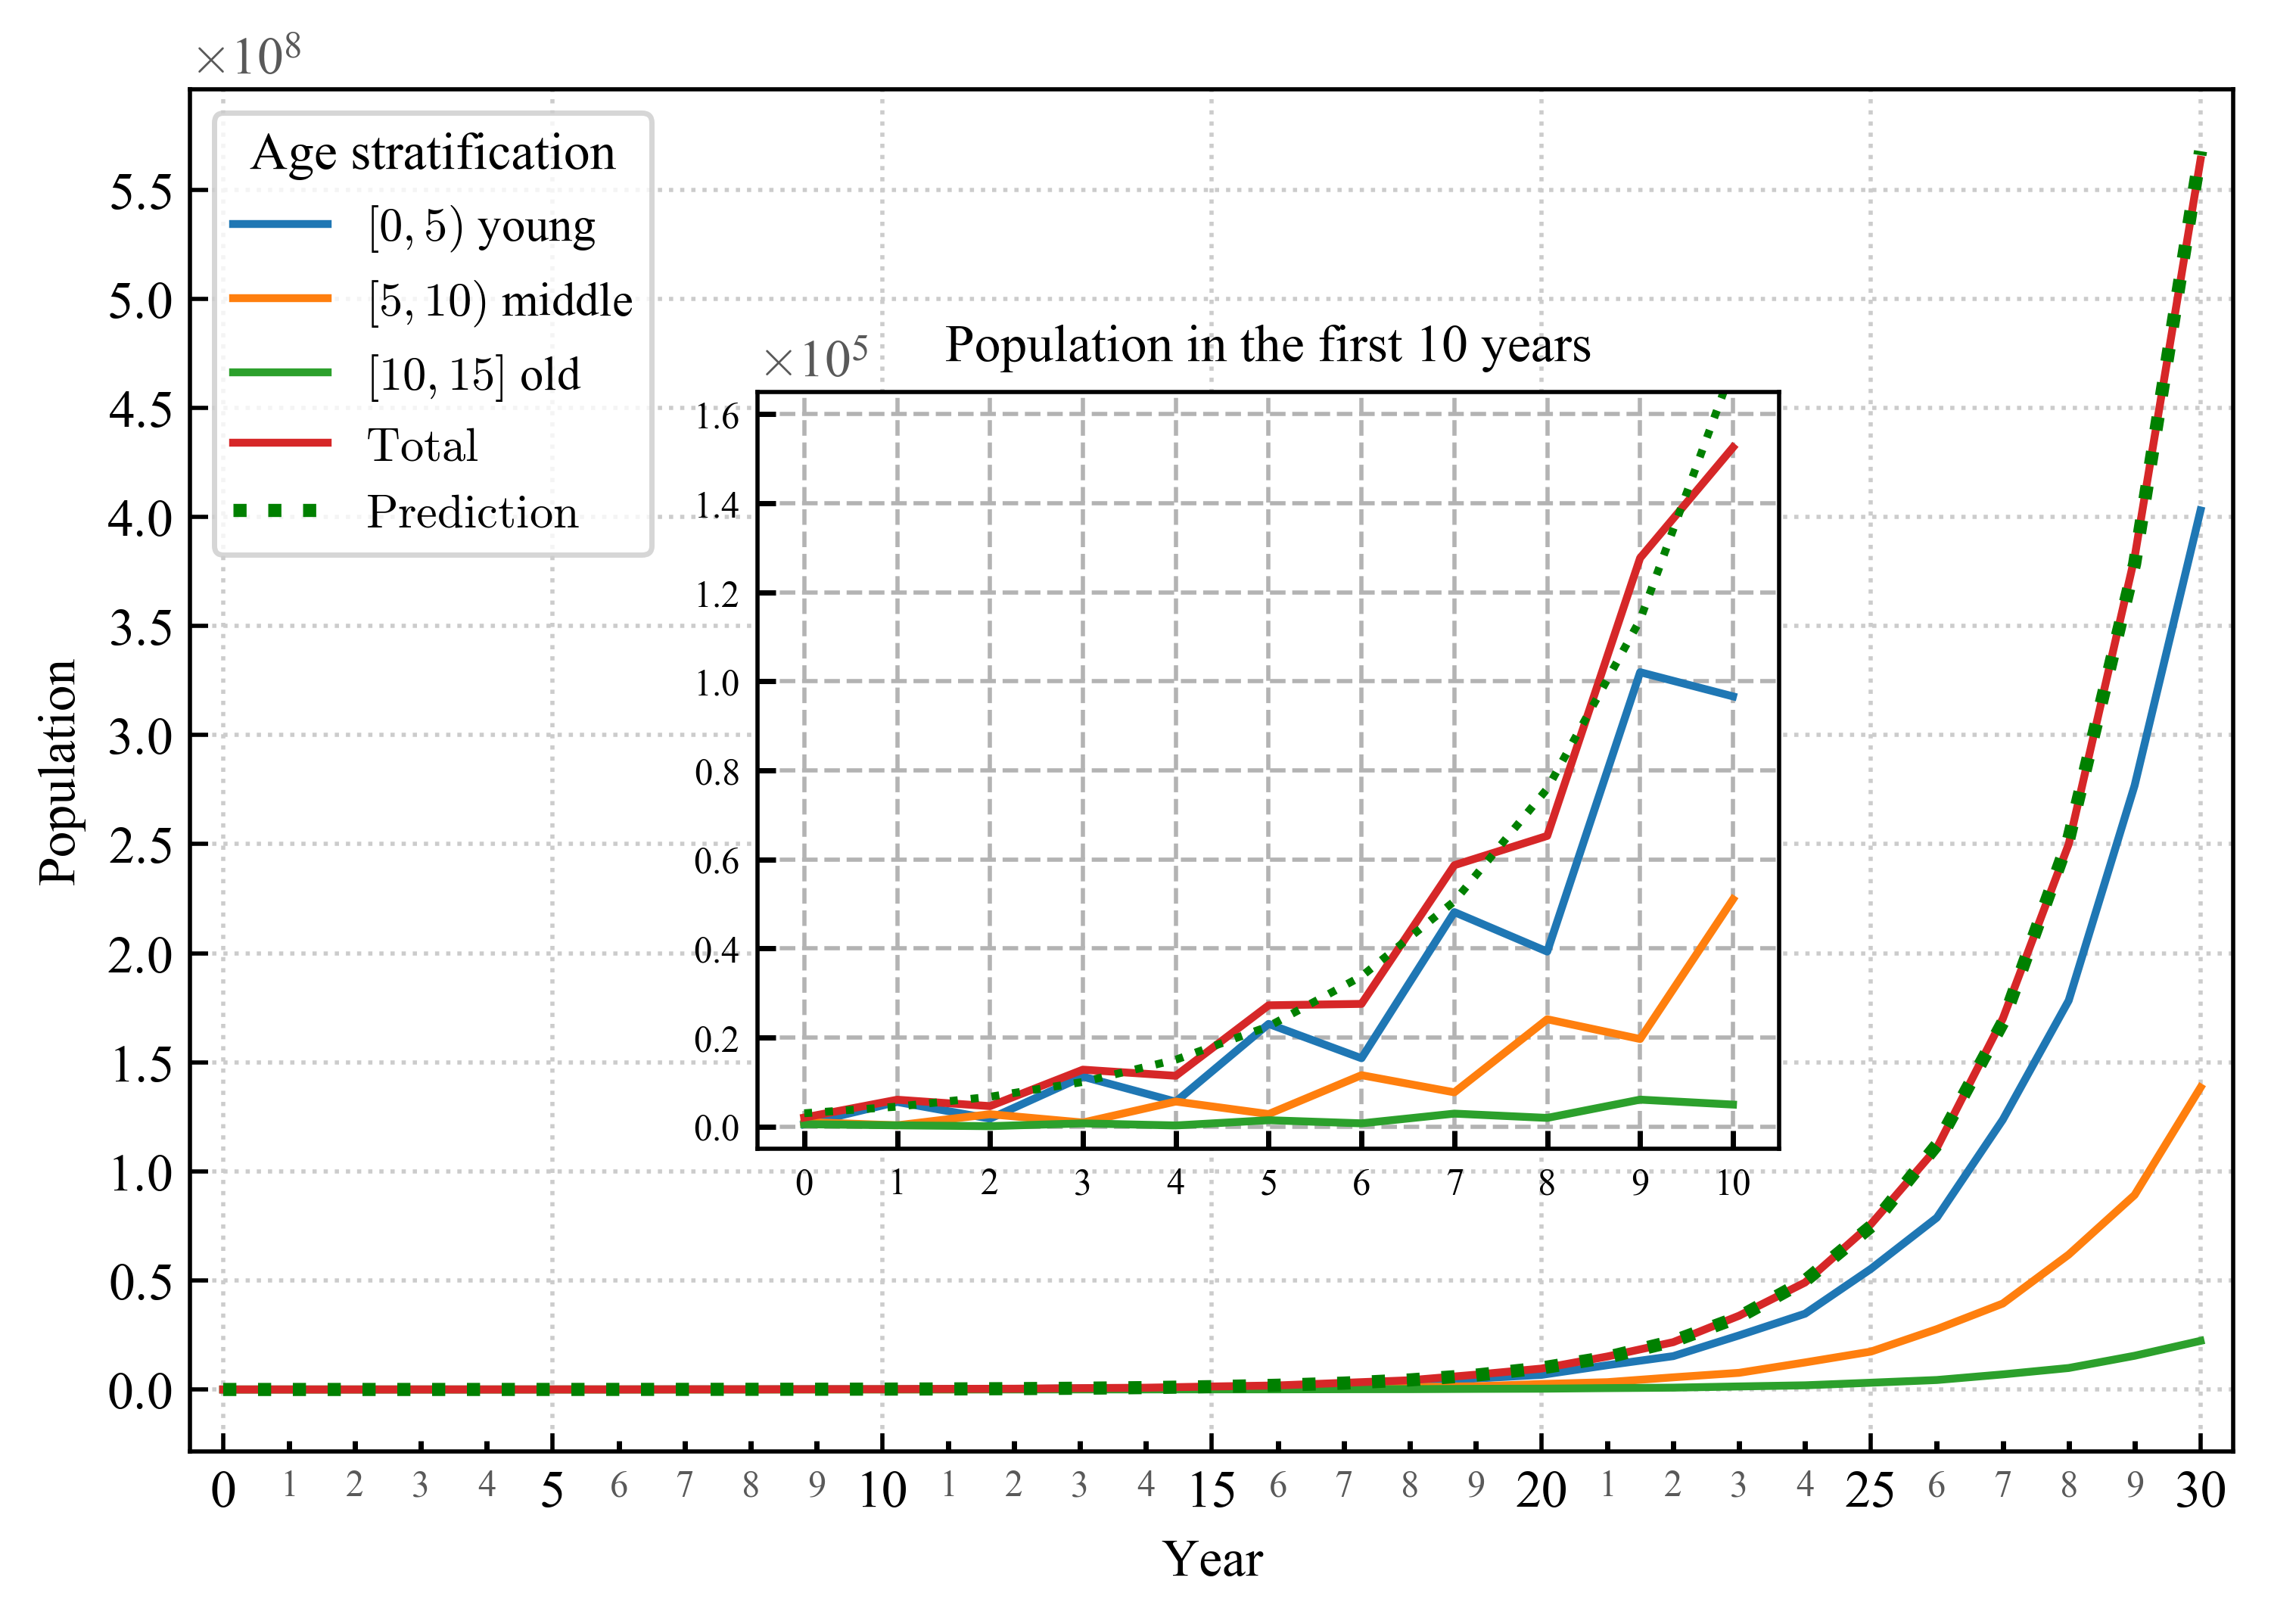

In [17]:
fig = plt.figure(dpi=500)
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax.plot(df.iloc[:, :4], label=[r'$[0, 5)$ young', r'$[5, 10)$ middle', r'$[10, 15]$ old', r'$\rm Total$'])
ax.plot(df.iloc[:, 4], ':', color='g', linewidth=2.5, label=r'$\rm Prediction$')
ax.set_yscale('linear')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend(title='Age stratification', fontsize=9)

ax1 = fig.add_axes([0.35, 0.3, 0.45, 0.5])
ax1.plot(df.iloc[:11, :4], label=[r'$[0, 5)$', r'$[5, 10)$', r'$[10, 15]$', r'$\rm Total$'])
ax1.plot(df.iloc[:11, 4], ':', color='g', linewidth=1.5)
# ax1.legend()
ax1.set_title('Population in the first 10 years', fontsize=10)

from matplotlib.ticker import MultipleLocator
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_formatter(lambda x, pos: "" if x%5==0 else f'{x%10:.0f}')
ax.yaxis.set_major_locator(MultipleLocator(.5e8))
ax.tick_params(which='minor', width=1.0, labelsize=7, labelcolor='0.35')
ax.set_xlim(-0.5, 30.5)
ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(2e4))
ax1.ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)
ax1.tick_params(which='major', width=1.0, labelsize=7, labelcolor='k')
ax1.tick_params(which='minor', width=1.0, labelsize=3, labelcolor='0.35')
ax1.set_ylim(-5000, 165000)

ax.grid(linestyle=':', color='0.8')
ax1.grid(linestyle='--', color='0.7')

fig.show()

---
### 3.1.3 PageRank 算法
1. 有向图$D=(V, A, \boldsymbol W)$，邻接矩阵$\boldsymbol W=\left( w_{ij} \right)_{N\times N}$ ，其中
   $$
   w_{ij}=\left \{
   \begin{align*}
   1,\quad &\text {从网页{\it i}\,到网页{\it j}\,有超链接}\\
   0,\quad &\text {否则}
   \end{align*}
   \right .
   $$
   

2. 矩阵$\boldsymbol W$的行和$r_i=\sum\limits_{j=1}^{N}w_{ij}$，定义矩阵$\boldsymbol P=\left( p_{ij}\right)_{N\times N}$如下
   $$
   p_{ij}=\dfrac{w_{ij}}{r_i}, \quad i, j=1, 2, \cdots, N
   $$
   

3. 求马尔科夫链的平均分布$\boldsymbol x=[x_1, x_2, \cdots, x_N]^{\rm T}$，它满足
   $$
   {\boldsymbol P}^{\rm T}{\boldsymbol x}={\boldsymbol x}, \quad \sum\limits_{i=1}^N x_i=1
   $$

[0.27272727 0.27272727 0.13636364 0.18181818 0.04545455 0.09090909]


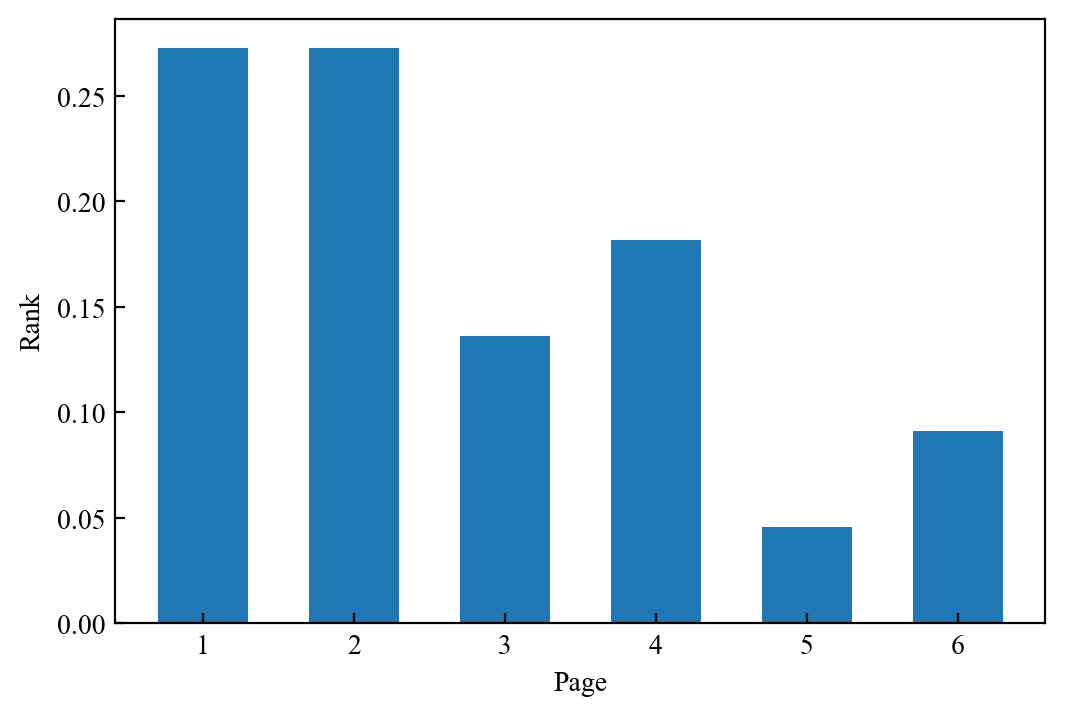

In [14]:
import numpy as np
from scipy.sparse.linalg import eigs
D = [(1,2), (2,3), (2,4), (3,4), (3,5), (3,6), (4,1), (5,6), (6,1)]
W = np.zeros((6,6))
for p in D:
    W[p[0]-1, p[1]-1] = 1
r = np.sum(W, axis=1, keepdims=True)
P = W/r
val, vec = eigs(P.T, 1)
V = vec.flatten()
V = V/sum(V)
V = V.real
print(V)
val, vec = eigs(P.T, 1)
fig, ax = plt.subplots()
ax.bar(range(1, len(V)+1), V, width=0.6)
ax.set_xlabel('Page')
ax.set_ylabel('Rank')
fig.show()

#### 随机冲浪模型
$$\widetilde {\boldsymbol P}=\dfrac{(1-d)}{N}\boldsymbol {ee}^{\rm T}+d\boldsymbol P$$

在随机冲浪模型中，求各个页面等级的PageRank值的问题归结为求矩阵$\widetilde {\boldsymbol P}$的转置矩阵$\widetilde {\boldsymbol P}^{\rm T}$的最大特征值$1$对应的归一化特征向量问题

[0.26752808 0.25239887 0.13226952 0.16974588 0.06247636 0.11558127]


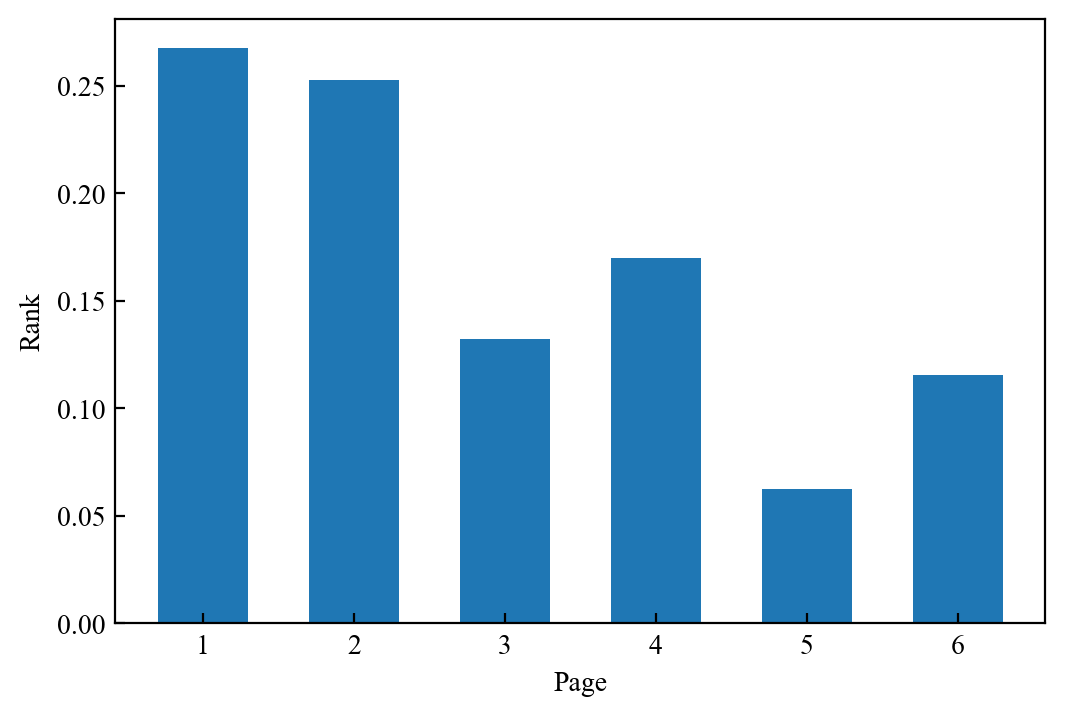

In [15]:
d = 0.85
Ptilde = (1-d)/len(P)*np.ones_like(P) + d*P
val, vec = eigs(Ptilde.T, 1)
V = vec.flatten()
V = V/sum(V)
V = V.real
print(V)
fig, ax = plt.subplots()
ax.bar(range(1, len(V)+1), V, width=0.6)
ax.set_xlabel('Page')
ax.set_ylabel('Rank')
fig.show()